# Step 0: Âõ∫ÂÆöÈöèÊú∫ÁßçÂ≠ê

# Step 1: Load data

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import torch
import random

# Step 0: Âõ∫ÂÆöÈöèÊú∫ÁßçÂ≠ê
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
print(f"‚úÖ Â∑≤ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê: {seed}")


import sys
sys.path.append("/home/vs_theg/ST_program/cell_program_deconvolution/cell_program_deconvolution/")  # Ê∑ªÂä†‰∏äÁ∫ßÁõÆÂΩïÂà∞PythonË∑ØÂæÑ
from deconvolution.model import DeconvModel
from deconvolution.graph_utils import build_laplacian
from deconvolution.train import train_model
from deconvolution.visualize import plot_spatial, plot_program_contribution

sys.path.append("/home/vs_theg/ST_program/CellType_GP/CellType-GP")  # Ê∑ªÂä†‰∏äÁ∫ßÁõÆÂΩïÂà∞PythonË∑ØÂæÑ
from train_utils import train_model_2

# Step 1: Load data
data = np.load("/home/vs_theg/ST_program/CellType_GP/DATA/preprocessing_outputs/spot_data_full.npz", allow_pickle=True)
Y = torch.tensor(data["visium_score"], dtype=torch.float32)         # (P, S)
X = torch.tensor(data["spot_cluster_fraction_matrix"], dtype=torch.float32)         # (S, T)
coords = data["coords"]                                  # (S, 2)

spot_names = data['spot_names']
celltype_names = data['celltype_names']
program_names = data['program_names']

# Êü•ÁúãÊï∞ÊçÆÂâçÂá†Ë°å
print("Y (shape: {}):".format(Y.shape))
print(Y[:5, :5])  # Êü•ÁúãÂâç5Ë°åÂâç5Âàó
print("\nX (shape: {}):".format(X.shape))
print(X[:5, :6])  # Êü•ÁúãÂâç5Ë°åÂâç5Âàó
print("\ncoords (shape: {}):".format(coords.shape))
print(coords[:5])  # Êü•ÁúãÂâç5Ë°å

P, S = Y.shape
S_, T = X.shape
assert S == S_

L = build_laplacian(coords, k=6)
model = DeconvModel(T=T, P=P, S=S, X_tensor=X, L=L)


‚úÖ Â∑≤ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê: 42
Y (shape: torch.Size([13, 3953])):
tensor([[0.2741, 0.2692, 0.2627, 0.1067, 0.5122],
        [0.2596, 0.2071, 0.3248, 0.0480, 0.1580],
        [0.2877, 0.6234, 0.3451, 0.2823, 0.2601],
        [0.2727, 0.3972, 0.2551, 0.4064, 0.2967],
        [0.3123, 0.5241, 0.4290, 0.3826, 0.3049]])

X (shape: torch.Size([3953, 6])):
tensor([[0.0000, 0.0714, 0.0000, 0.8571, 0.0000, 0.0714],
        [0.0213, 0.1702, 0.1915, 0.4043, 0.1064, 0.1064],
        [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.2222, 0.1111, 0.0000, 0.5556, 0.0000, 0.1111],
        [0.0000, 0.0455, 0.0000, 0.9545, 0.0000, 0.0000]])

coords (shape: (3953, 2)):
[[13355. 16640.]
 [ 8845. 12067.]
 [14716. 15518.]
 [11404. 12365.]
 [ 7452.  9059.]]


## Ê£ÄÊü•ÊãâÊôÆÊãâÊñØÁü©ÈòµÁöÑÂçäÊ≠£ÂÆöÊÄß

In [6]:
eigvals = torch.linalg.eigvalsh(L)
print(eigvals.min().item(), eigvals.max().item(), torch.allclose(L, L.T, atol=1e-6))
# ËæìÂá∫ÊúÄÂ∞èÁâπÂæÅÂÄº„ÄÅÊúÄÂ§ßÁâπÂæÅÂÄº„ÄÅÂØπÁß∞ÊÄßÊ£ÄÊü•ÁªìÊûúÔºåÁ°Æ‰øùÊãâÊôÆÊãâÊñØÁü©ÈòµLÊòØÂçäÊ≠£ÂÆöÁöÑ

2.034969242004081e-07 1.4985674619674683 True


# Step 2: Train model

In [7]:
import os
os.chdir('/home/vs_theg/ST_program/CellType_GP/DATA')

In [ ]:
# Step 2: Train model
# train_model(model,  Y_obs=Y, num_epochs=6000, lr=1e-4, lambda1=0, lambda2=0)

# Ëã•ÈúÄstep5, ÂèØÂèñÊ∂à‰∏ã‰∏ÄË°åÊ≥®ÈáäËÆ≠ÁªÉ
history = train_model_2(model,  Y_obs=Y, num_epochs=1000, lr=1e-3, lambda1=0.5, lambda2=0)  # lambda1=Ôºà0,1e-6,1e-2,0.5Ôºâ

Epoch    0 | Loss 77070.7266 | Recon 0.1232 | LR 1.00e-03:   0%| | 1/3000 [00:08<6:57:04,  8.34s/it]

üîç [‰∏≠Èó¥Â±ÇÊ£ÄÊü•] Epoch 0
  Y_tps  mean=4.989164e-01, std=2.887343e-01
  Y_pred mean=4.985705e-01, std=2.273635e-01


Epoch  147 | Loss 56073.9609 | Recon 0.0793 | LR 1.00e-03:   5%| | 148/3000 [24:07<7:44:54,  9.78s/i


KeyboardInterrupt: 

In [5]:
print(history)

{'total_loss': array([1.23186447e-01, 1.22621417e-01, 1.22058406e-01, ...,
       1.79186785e-07, 1.77577633e-07, 1.75982294e-07]), 'recon_loss': array([1.23186447e-01, 1.22621417e-01, 1.22058406e-01, ...,
       1.79186785e-07, 1.77577633e-07, 1.75982294e-07]), 'l1_loss': array([154141.203125, 154055.015625, 153969.015625, ..., 131290.859375,
       131290.859375, 131290.84375 ]), 'smooth_loss': array([25752.93164062, 25734.34765625, 25715.96679688, ...,
       27191.69335938, 27191.71289062, 27191.73242188]), 'lr': array([0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001]), 'best_loss': 4.94072583023808e-06, 'best_epoch': 1782}


# Step 3: ÁîüÊàêÊúÄÁªàÈ¢ÑÊµãÁªìÊûú Y_pred_df


In [7]:
# Âä†ËΩΩÊúÄ‰ºòepochÁöÑÁªìÊûú

import torch

# best_model_path = os.path.join(save_dir, "best_model.pt")
state_dict = torch.load('/home/vs_theg/ST_program/CellType_GP/DATA/training_logs/4/best_model.pt')
model.load_state_dict(state_dict)

print(f"‚úÖ Â∑≤Âä†ËΩΩÊúÄ‰ºòÊ®°ÂûãÔºàepoch={history['best_epoch']}, loss={history['best_loss']:.6f}Ôºâ")


‚úÖ Â∑≤Âä†ËΩΩÊúÄ‰ºòÊ®°ÂûãÔºàepoch=1782, loss=0.000005Ôºâ


In [8]:
with torch.no_grad():
    Y_pred_best = model.forward()
    print("Y_pred_best mean:", Y_pred_best.mean().item())


Y_pred_best mean: 0.2909089922904968


In [9]:
import torch
import numpy as np
import pandas as pd

# Step 3: ÁîüÊàêÊúÄÁªàÈ¢ÑÊµãÁªìÊûú
with torch.no_grad():
    Y_pred = model.forward().detach().cpu().numpy()  # shape: (P, S)

# ËΩ¨ÁΩÆÊàê (S, P) Êñπ‰æø‰∏é spot ÂØπÈΩê
Y_pred_df = pd.DataFrame(Y_pred.T, index=data['spot_names'], columns=data['program_names'])

Y_pred_df
# output_path_pred = '/home/vs_theg/ST_program/CellType_GP/DATA/training_logs/2/train_result(pred_matrix).csv'
# Y_pred_df.to_csv(output_path_pred)
# print(f"‚úÖ Â∑≤ÁîüÊàêÈ¢ÑÊµãÁü©ÈòµÔºö{Y_pred_df.shape}")
# print(f"üëâ ‰øùÂ≠òË∑ØÂæÑ: {output_path_pred}")


B_cell_score  T_cell_score  DCIS_Tumor_score  \
AACACGTGCATCGCAC-1      0.274057      0.259560          0.287749   
AACACTTGGCAAGGAA-1      0.269209      0.207147          0.623374   
AACAGGAAGAGCATAG-1      0.262670      0.324825          0.345071   
AACAGGATTCATAGTT-1      0.107298      0.051024          0.282323   
AACAGGTTATTGCACC-1      0.512169      0.158791          0.260148   
...                          ...           ...               ...   
TGTTGGAACCTTCCGC-1      0.231903      0.116308          0.263530   
TGTTGGAACGAGGTCA-1      0.074870      0.115753          0.309473   
TGTTGGAAGCTCGGTA-1      0.476516      0.532684          0.457137   
TGTTGGATGGACTTCT-1      0.198141      0.203521          0.480401   
TGTTGGCCAGACCTAC-1      0.299948      0.318176          0.237967   

                    Endothelial_score  Invasive_Tumor_score  IRF7+_DCs_score  \
AACACGTGCATCGCAC-1           0.272722              0.312345         0.344145   
AACACTTGGCAAGGAA-1           0.397175              0.524094         0.312375   
AACAGGAAGAGCATAG-1           0.255104              0.429125         0.287344   
AACAGGATTCATAGTT-1           0.406395              0.382635         0.139627   
AACAGGTTATTGCACC-1           0.296674              0.305033         0.322542   
...                               ...                   ...              ...   
TGTTGGAACCTTCCGC-1           0.270255              0.359070         0.162202   
TGTTGGAACGAGGTCA-1           0.418125              0.278746         0.227590   
TGTTGGAAGCTCGGTA-1           0.415692              0.476219         0.461754   
TGTTGGATGGACTTCT-1           0.240035              0.672634         0.224808   
TGTTGGCCAGACCTAC-1           0.117214              0.297470         0.292992   

                    LAMP3+_DCs_score  Macrophages_score  Mast_score  \
AACACGTGCATCGCAC-1          0.213144           0.397100    0.409188   
AACACTTGGCAAGGAA-1          0.313558           0.408017    0.184700   
AACAGGAAGAGCATAG-1          0.432405           0.485653    0.418350   
AACAGGATTCATAGTT-1          0.245880           0.323018    0.248225   
AACAGGTTATTGCACC-1          0.418281           0.523913    0.258362   
...                              ...                ...         ...   
TGTTGGAACCTTCCGC-1          0.130615           0.353660    0.099615   
TGTTGGAACGAGGTCA-1          0.276026           0.473332    0.199352   
TGTTGGAAGCTCGGTA-1          0.272580           0.591221    0.214741   
TGTTGGATGGACTTCT-1          0.219128           0.356467    0.050591   
TGTTGGCCAGACCTAC-1          0.117134           0.351059    0.194348   

                    Myoepi_ACTA2+_score  Myoepi_KRT15+_score  \
AACACGTGCATCGCAC-1             0.176970             0.135937   
AACACTTGGCAAGGAA-1             0.739782             0.413694   
AACAGGAAGAGCATAG-1             0.393704             0.259235   
AACAGGATTCATAGTT-1             0.229669             0.183081   
AACAGGTTATTGCACC-1             0.252987             0.206964   
...                                 ...                  ...   
TGTTGGAACCTTCCGC-1             0.347100             0.107520   
TGTTGGAACGAGGTCA-1             0.313807             0.217147   
TGTTGGAAGCTCGGTA-1             0.417795             0.232430   
TGTTGGATGGACTTCT-1             0.267523             0.187832   
TGTTGGCCAGACCTAC-1             0.242700             0.183323   

                    Perivascular-Like_score  Stromal_score  
AACACGTGCATCGCAC-1                 0.327647       0.618789  
AACACTTGGCAAGGAA-1                 0.432451       0.347488  
AACAGGAAGAGCATAG-1                 0.425000       0.489332  
AACAGGATTCATAGTT-1                 0.295997       0.589177  
AACAGGTTATTGCACC-1                 0.297242       0.658361  
...                                     ...            ...  
TGTTGGAACCTTCCGC-1                 0.292947       0.524267  
TGTTGGAACGAGGTCA-1                 0.405108       0.540682  
TGTTGGAAGCTCGGTA-1                 0.367407       0.419989  
TGTTGGATGG

# Step 4: ÂØºÂá∫ÊØè‰∏™programÁöÑË¥°ÁåÆÁü©Èòµ

In [12]:
# ==== Step 4 (new): ÂØºÂá∫ÊØè‰∏™ program ÁöÑË¥°ÁåÆÁü©ÈòµÔºåÂΩ¢Áä∂ S √ó (T*P) ====
import torch
import numpy as np
import pandas as pd

with torch.no_grad():
    # ÂèñÂá∫Ê®°ÂûãÂèÇÊï∞‰∏éËæìÂÖ•Âü∫Â∫ï
    Y_tps = model.Y_tps.detach().cpu()     # (T, P, S)
    X_spot_t = model.X.detach().cpu()      # (S, T)

    T, P, S = Y_tps.shape

    # ËÆ°ÁÆóÊØè‰∏™ program ÁöÑË¥°ÁåÆ: contrib[s,t,p] = X[s,t] * Y_tps[t,p,s]
    # ÂÖàÂæóÂà∞ (S, T, P) ÁöÑÂº†Èáè
    contrib_stp = torch.einsum('st,tps->stp', X_spot_t, Y_tps)  # (S, T, P)

    # Ê†°È™åÔºöÊ≤ø T Ê±ÇÂíåÂ∫îÂΩìÁ≠â‰∫é Y_pred^T (S,P)
    Y_pred = model.forward().detach().cpu().T  # (S, P)
    recon_err = (contrib_stp.sum(dim=1) - Y_pred).abs().max().item()
    print(f"‚úÖ Â§çÊ†∏Ôºömax|sum_t(contrib) - Y_pred| = {recon_err:.3e}")

    # Â±ïÂπ≥‰∏∫ (S, T*P)ÔºåÂπ∂Êåâ (celltype, program) ÁîüÊàêÂàóÂêç
    contrib_flat = contrib_stp.reshape(S, T * P)  # (S, T*P)

# ÂáÜÂ§áÁ¥¢Âºï‰∏éÂàóÂêçÔºà‰∏é‰Ω†‰πãÂâçÁöÑ‰∏ÄËá¥Ôºâ
spot_names = data['spot_names']          # ÈïøÂ∫¶ S
celltype_names = data['celltype_names']  # ÈïøÂ∫¶ P
program_names = data['program_names']    # ÈïøÂ∫¶ T

# Ê≥®ÊÑèÂàóÂêçÊ¨°Â∫èÈúÄ‰∏é reshape Ê¨°Â∫è‰∏ÄËá¥ÔºöËøôÈáåÊòØÂÖàÊ≤ø P ÊÖ¢ÔºåT Âø´ or Âèç‰πãÔºü
# ‰∏äÈù¢ reshape ÊòØ (S, T, P) -> (S, T*P)ÔºåÂç≥ T Áª¥Âú®Ââç„ÄÅP Áª¥Âú®Âêé„ÄÇ
# Ëã•‰Ω†Â∏åÊúõÂàóÂêçÈ°∫Â∫è‰∏∫ [ct1+pg1, ct1+pg2, ...]ÔºåÈÇ£Â∞±ÂÖà‰∫§Êç¢Áª¥Â∫¶‰∏∫ (S, P, T) ÂÜçÂ±ïÂπ≥Ôºö
contrib_spt = contrib_stp.permute(0, 2, 1).contiguous()  # (S, P, T)
contrib_flat = contrib_spt.reshape(S, P * T)             # (S, P*T)

columns = [f"{ct}+{pg}" for ct in celltype_names for pg in program_names]
df_contrib = pd.DataFrame(contrib_flat.numpy(), index=spot_names, columns=columns)

out_path = '/home/vs_theg/ST_program/CellType_GP/DATA/training_logs/4/train_resulu.csv'
df_contrib.to_csv(out_path)
print(f"üì¶ Â∑≤ÂØºÂá∫ program Á∫ßË¥°ÁåÆÁü©ÈòµÔºö{df_contrib.shape} ‚Üí {out_path}")


‚úÖ Â§çÊ†∏Ôºömax|sum_t(contrib) - Y_pred| = 5.960e-08
üì¶ Â∑≤ÂØºÂá∫ program Á∫ßË¥°ÁåÆÁü©ÈòµÔºö(3953, 78) ‚Üí /home/vs_theg/ST_program/CellType_GP/DATA/training_logs/4/train_resulu.csv


In [13]:
df_contrib

Endothelial+B_cell_score  Endothelial+T_cell_score  \
AACACGTGCATCGCAC-1                  0.000000                  0.014843   
AACACTTGGCAAGGAA-1                  0.014704                  0.042590   
AACAGGAAGAGCATAG-1                  0.000000                  0.000000   
AACAGGATTCATAGTT-1                  0.077944                  0.021272   
AACAGGTTATTGCACC-1                  0.000000                  0.018242   
...                                      ...                       ...   
TGTTGGAACCTTCCGC-1                  0.000000                  0.000000   
TGTTGGAACGAGGTCA-1                  0.000000                 -0.005729   
TGTTGGAAGCTCGGTA-1                  0.032718                  0.050888   
TGTTGGATGGACTTCT-1                  0.021397                  0.051135   
TGTTGGCCAGACCTAC-1                  0.000000                  0.000000   

                    Endothelial+DCIS_Tumor_score  \
AACACGTGCATCGCAC-1                      0.000000   
AACACTTGGCAAGGAA-1                      0.011439   
AACAGGAAGAGCATAG-1                      0.000000   
AACAGGATTCATAGTT-1                      0.000000   
AACAGGTTATTGCACC-1                      0.000000   
...                                          ...   
TGTTGGAACCTTCCGC-1                      0.000000   
TGTTGGAACGAGGTCA-1                      0.000000   
TGTTGGAAGCTCGGTA-1                      0.019780   
TGTTGGATGGACTTCT-1                      0.000000   
TGTTGGCCAGACCTAC-1                      0.000000   

                    Endothelial+Endothelial_score  \
AACACGTGCATCGCAC-1                       0.268675   
AACACTTGGCAAGGAA-1                       0.182022   
AACAGGAAGAGCATAG-1                       0.262670   
AACAGGATTCATAGTT-1                       0.044343   
AACAGGTTATTGCACC-1                       0.493927   
...                                           ...   
TGTTGGAACCTTCCGC-1                       0.231903   
TGTTGGAACGAGGTCA-1                       0.080600   
TGTTGGAAGCTCGGTA-1                       0.018617   
TGTTGGATGGACTTCT-1                       0.019212   
TGTTGGCCAGACCTAC-1                       0.282835   

                    Endothelial+Invasive_Tumor_score  \
AACACGTGCATCGCAC-1                          0.000000   
AACACTTGGCAAGGAA-1                         -0.000111   
AACAGGAAGAGCATAG-1                          0.000000   
AACAGGATTCATAGTT-1                          0.000000   
AACAGGTTATTGCACC-1                          0.000000   
...                                              ...   
TGTTGGAACCTTCCGC-1                          0.000000   
TGTTGGAACGAGGTCA-1                          0.000000   
TGTTGGAAGCTCGGTA-1                          0.012219   
TGTTGGATGGACTTCT-1                          0.089503   
TGTTGGCCAGACCTAC-1                          0.000000   

                    Endothelial+IRF7+_DCs_score  Endothelial+LAMP3+_DCs_score  \
AACACGTGCATCGCAC-1                    -0.009461                      0.000000   
AACACTTGGCAAGGAA-1                     0.018566                      0.014901   
AACAGGAAGAGCATAG-1                     0.000000                      0.000000   
AACAGGATTCATAGTT-1                    -0.036260                     -0.063067   
AACAGGTTATTGCACC-1                     0.000000                      0.000000   
...                                         ...                           ...   
TGTTGGAACCTTCCGC-1                     0.000000                      0.000000   
TGTTGGAACGAGGTCA-1                     0.000000                      0.000000   
TGTTGGAAGCTCGGTA-1                     0.342294                      0.033285   
TGTTGGATGGACTTCT-1                     0.016894                      0.032582   
TGTTGGCCAGACCTAC-1                     0.017113                      0.000000   

                    Endothelial+Macrophages_score  Endothelial+Mast_score  \
AACACGTGCATCGCAC-1                       0.003800                0.000000   
AACACTTGGCAAGGAA-1                       0.041194                0.11

# Step 4: ÂèØËßÜÂåñÁªìÊûú

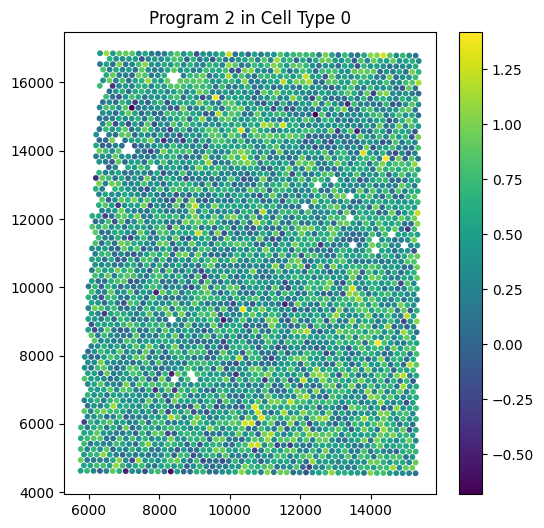

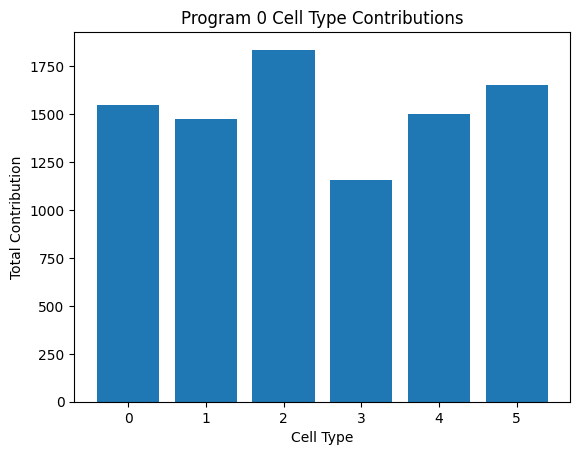

In [15]:
# Step 4: Visualize results
Y_tps = model.Y_tps.detach()
plot_spatial(Y_tps, coords, cell_type=0, program_index=2)
plot_program_contribution(Y_tps, program_index=0)


import numpy as np
import pandas as pd


# Step 5: Convert Y_tps to wide DataFrame and save
# ÂÅáËÆæ Y_tps ÂΩ¢Áä∂‰∏∫ (T, P, S)
Y_tps = model.Y_tps.detach().cpu().numpy()
T, P, S = Y_tps.shape

# Á°Æ‰øùÁ¥¢Âºï
spot_names = data['spot_names']
celltype_names = data['celltype_names']
program_names = data['program_names']


# 1Ô∏è‚É£ ÈáçÊñ∞ÊéíÂàóÁª¥Â∫¶Ôºö (S, T, P)
Y_tps_reordered = np.transpose(Y_tps, (2, 0, 1))  # S x T x P

# 2Ô∏è‚É£ Â±ïÂπ≥ÊØè‰∏™ spot ÁöÑ (T√óP) ÂêëÈáè
Y_tps_flat = Y_tps_reordered.reshape(S, T * P)

# 3Ô∏è‚É£ÊûÑÈÄ† DataFrame
columns = [f"{ct}+{pg}" for ct in celltype_names for pg in program_names]
y_tps_matrix_df = pd.DataFrame(Y_tps_flat, index=spot_names, columns=columns)

# # 4Ô∏è‚É£ ‰øùÂ≠òÁªìÊûú
# output_path = '/home/vs_theg/ST_program/CellType_GP/DATA/notebook_outputs/train1000_342_result(wide).csv'
# y_tps_matrix_df.to_csv(output_path, index=True)
# print(f"‚úÖ Â∑≤ÁîüÊàêÁü©ÈòµË°®Ôºö{y_tps_matrix_df.shape[0]} √ó {y_tps_matrix_df.shape[1]}")
# print(f"üëâ ‰øùÂ≠òË∑ØÂæÑ: {output_path}")



In [16]:
y_tps_matrix_df

Endothelial+B_cell_score  Endothelial+T_cell_score  \
AACACGTGCATCGCAC-1                  0.882269                  0.298372   
AACACTTGGCAAGGAA-1                  0.691075                  0.700329   
AACAGGAAGAGCATAG-1                  0.382864                  0.738580   
AACAGGATTCATAGTT-1                  0.350749                 -0.283800   
AACAGGTTATTGCACC-1                  0.390448                  0.490025   
...                                      ...                       ...   
TGTTGGAACCTTCCGC-1                  0.473746                  0.518651   
TGTTGGAACGAGGTCA-1                  0.340976                  0.746484   
TGTTGGAAGCTCGGTA-1                  0.637999                  0.649064   
TGTTGGATGGACTTCT-1                  0.299557                  0.456149   
TGTTGGCCAGACCTAC-1                  0.379969                  0.978203   

                    Endothelial+DCIS_Tumor_score  \
AACACGTGCATCGCAC-1                      0.677642   
AACACTTGGCAAGGAA-1                      0.716057   
AACAGGAAGAGCATAG-1                      0.257656   
AACAGGATTCATAGTT-1                      0.271056   
AACAGGTTATTGCACC-1                      0.312839   
...                                          ...   
TGTTGGAACCTTCCGC-1                      0.395452   
TGTTGGAACGAGGTCA-1                      0.246313   
TGTTGGAAGCTCGGTA-1                      0.499303   
TGTTGGATGGACTTCT-1                      0.654237   
TGTTGGCCAGACCTAC-1                      0.472089   

                    Endothelial+Endothelial_score  \
AACACGTGCATCGCAC-1                       0.717133   
AACACTTGGCAAGGAA-1                      -0.128532   
AACAGGAAGAGCATAG-1                       0.344439   
AACAGGATTCATAGTT-1                       0.391211   
AACAGGTTATTGCACC-1                       0.315508   
...                                           ...   
TGTTGGAACCTTCCGC-1                       0.533089   
TGTTGGAACGAGGTCA-1                       0.301264   
TGTTGGAAGCTCGGTA-1                       0.404902   
TGTTGGATGGACTTCT-1                       0.426138   
TGTTGGCCAGACCTAC-1                       0.247183   

                    Endothelial+Invasive_Tumor_score  \
AACACGTGCATCGCAC-1                          0.370031   
AACACTTGGCAAGGAA-1                          0.847739   
AACAGGAAGAGCATAG-1                          0.793542   
AACAGGATTCATAGTT-1                          0.628870   
AACAGGTTATTGCACC-1                          0.062482   
...                                              ...   
TGTTGGAACCTTCCGC-1                          0.256375   
TGTTGGAACGAGGTCA-1                          0.502325   
TGTTGGAAGCTCGGTA-1                          0.945909   
TGTTGGATGGACTTCT-1                         -0.062579   
TGTTGGCCAGACCTAC-1                          0.555580   

                    Endothelial+IRF7+_DCs_score  Endothelial+LAMP3+_DCs_score  \
AACACGTGCATCGCAC-1                     0.883649                      0.081077   
AACACTTGGCAAGGAA-1                     0.675450                      0.282375   
AACAGGAAGAGCATAG-1                     0.609370                      0.116802   
AACAGGATTCATAGTT-1                    -0.128384                      0.650912   
AACAGGTTATTGCACC-1                     0.817790                      0.796522   
...                                         ...                           ...   
TGTTGGAACCTTCCGC-1                     0.470841                      0.183293   
TGTTGGAACGAGGTCA-1                     0.339842                      0.972598   
TGTTGGAAGCTCGGTA-1                     0.956227                     -0.071819   
TGTTGGATGGACTTCT-1                     0.368713                      0.476932   
TGTTGGCCAGACCTAC-1                     0.891071                      0.887011   

                    Endothelial+Macrophages_score  Endothelial+Mast_score  \
AACACGTGCATCGCAC-1                       0.596643                0.724189   
AACACTTGGCAAGGAA-1                       0.602777                0.02